# Lab 2 - Exploring Text Data - Rupal Sanghavi, Omar Roa

# Business Overview

We are using articles from theguardian.com, a British news and media website.  Specifically, we are extracting the body of articles from the paper's API. These results will contain articles from their newspapers, "The Guardian" and "The Observer", as well as their additional online content. We are querying theguardian.com for articles on Brexit. Thus, our data is a collection of words from our query results.

We are querying theguardian.com because we are interested in web content and how certain text can affect views. Views mean ad revenue. This is important as online content continues to grow, content creators need any advantage they can get. We found Brexit to be topical and time appropriate.

A topic we want to analyze is frequency of words and their relation to certain tags. For example, The Guardian API has a tag for "star-rating" which would allow us to see what words appear in popular and unpopular articles.  This could help us determine if based on certain words if an article will be popular. We can also find relationships between word frequency and article contributors, production-office, . We could determine based on word frequencies if an article will contain a certain tag.

Another item we want to analyze in the future is the frequency of certain words and where they fit on a grade level. We want to see if our dataset contains more words for higher or lower literacy readers. According to the Nielson Group, 30% of web users have lower literacy, which is reading around an 8th grade level. Based on word frequencies, we can see if changing word frequencies could allow for a different range of audience.

We will know if if we have gathered useful information if we see words appropriate to Brexit (perhaps Europe or borders) in our frequencies. Later on, we will know if our data is further useful if we can actually use our machine learning algorithms to make correct predictions on articles.

While we could not find specific metrics that others have used to predict articles based on a feature, we do know that it is a topic of interest. The following links are a presentation on how the Washington Post uses machine learning to predict popular articles and a high level overview on how to use machine learning for that purpose.

https://conferences.oreilly.com/strata/strata-ny-2016/public/schedule/detail/51468

https://www.safaribooksonline.com/library/view/strata-hadoop/9781491944660/video282747.html

http://www.chioka.in/how-to-predict-a-popular-article-with-machine-learning-part-1/

# Data Encoding

## Reading Data as Strings

In [86]:
import requests
import json
import pandas as pd
import numpy as np
from contextlib import closing
# make base URL and dictionary of get request key/values
url = "https://content.guardianapis.com/search"
payload = {'api-key': "6ff8fcd2-050d-4801-a29f-848c8b750b6e", 'q':'brexit', 'show-blocks':'body', 
           'page-size': 200, 'show-tags': 'contributor'} # key/values for get request (look up in api, there are lots)

# Perform the actual request
with closing(requests.get(url,params=payload)) as r:
    articles = r.json()
summaries = [x['blocks']['body'][0]['bodyTextSummary'] for x in articles['response']['results'] if x['tags']]
words = [word for document in summaries for word in document.split()]
print(words)
print(len(words))

['European', 'Union', 'exit', 'and', 'trade', '(European', 'affairs)', 'sub-committee', 'PM', 'I', 'went', 'to', 'Brussels.', 'Met', 'the', 'EU', 'leaders.', 'They', 'wanted', 'to', 'know', 'our', 'plan.', 'I', 'had', 'nothing', 'to', 'tell', 'them.', 'Foreign', 'secretary', 'Rome', 'wasn’t', 'built', 'in', 'a', 'day.', 'PM', 'We', 'need', 'a', 'plan.', 'The', 'EU', 'wants', 'to', 'know', 'the', 'plan.', 'Parliament', 'wants', 'to', 'know', 'the', 'plan.', 'It', 'has', 'been', 'four', 'frigging', 'months!', 'No', 'plan!', 'I’m', 'beginning', 'to', 'wonder', 'if', 'this', 'will', 'be', 'over', 'in', 'my', 'lifetime.', 'Foreign', 'secretary', 'Probably', 'not.', 'How', 'old', 'are', 'you,', 'actually?', 'PM', 'You', 'three', 'ran', 'the', 'leave', 'campaign.', 'I', 'assumed', 'you', 'had', 'some', 'idea', 'what', 'to', 'do.', 'Foreign', 'secretary', 'Nope.', 'Trade', 'minister', 'The', 'Great', 'Repeal', 'bill', 'will', 'solve', 'the', 'problem.', 'PM', 'No.', 'EU-related', 'law', 'const

In [87]:
doc_lengths = []
for document in summaries:
    length = 0
    for word in document.split():
        length += 1
    doc_lengths.append(length)

In [88]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

## Verifying Data Quality and Bag of Words and TF-IDF Representations

#### We removed stop words, random numbers, and mixed strings. We chose to not remove years because they are relevant information for our analyses.

We combined stop words from scikit-Learn's original source and 2 others, for 617 stop words.

https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/feature_extraction/stop_words.py

https://sites.google.com/site/kevinbouge/stopwords-lists

http://algs4.cs.princeton.edu/35applications/stopwords.txt

In [89]:
# combined stop words from scikit-Learn's original source and 2 others, for 617 stop words
# https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/feature_extraction/stop_words.py
# https://sites.google.com/site/kevinbouge/stopwords-lists
# http://algs4.cs.princeton.edu/35applications/stopwords.txt
with open("combined_stop_words.txt") as textfile:
    stopwords = textfile.readlines()
    stopwords = [word.strip() for word in stopwords]

In [90]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words=stopwords)
# count_vect = CountVectorizer(stop_words=stopwords,
#                               max_df=0.01,
#                               min_df=4)
bag = count_vect.fit_transform(summaries)
pd.options.display.max_columns = 999
df = pd.DataFrame(data=bag.toarray(),columns=count_vect.get_feature_names())
for column in list(df):
    if any(char.isdigit() for char in column):
        if column.isdigit():
            if (int(column) > 1900):
                random = []
            else:
                df = df.drop(column, 1)
        else:
            df = df.drop(column, 1)
df

1917  1918  1920  1924  1933  1935  1936  1939  1957  1959  1963  1966  \
0       0     0     0     0     0     0     0     0     0     0     0     0   
1       0     0     0     0     0     0     0     0     0     0     0     0   
2       0     0     0     0     0     0     0     0     0     0     0     0   
3       0     0     0     0     0     0     0     0     0     0     0     0   
4       0     0     0     0     0     0     0     0     0     0     0     0   
5       0     0     0     0     0     0     0     0     0     0     0     0   
6       0     0     0     0     0     0     0     0     0     0     0     0   
7       0     0     0     0     0     0     0     0     0     0     0     0   
8       0     0     0     0     0     0     0     0     0     0     0     0   
9       0     0     0     0     0     0     0     0     0     0     0     0   
10      0     0     0     0     0     0     0     0     0     0     0     0   
11      0     0     0     0     2     0     1     0     0     0     1     0   
12      0     0     0     0     0     0     0     0     0     0     0     0   
13      0     0     0     0     0     0     0     0     0     0     0     0   
14      0     0     0     0     0     0     0     0     0     0     0     0   
15      0     0     0     0     0     0     0     0     0     0     0     0   
16      0     0     0     0     0     0     0     0     0     0     0     0   
17      0     0     0     0     0     0     0     0     0     0     0     0   
18      0     0     0     0     0     0     0     0     0     0     0     0   
19      0     0     0     0     0     0     0     1     0     0     0     0   
20      0     0     0     0     0     0     0     0     0     0     0     0   
21      0     0     0     0     0     0     0     0     0     0     0     0   
22      0     0     0     0     0     0     0     0     0     0     0     0   
23      0     0     0     0     0     0     0     0     0     0     0     0   
24      0     0     0     0     0     0     0     0     0     0     0     0   
25      0     0     0     0     0     0     0     0     1     0     0     0   
26      0     0     0     0     0     0     0     0     0     0     0     0   
27      0     0     0     0     0     0     0     0     0     0     0     0   
28      0     0     0     0     0     0     0     0     0     0     0     0   
29      0     0     0     0     0     0     0     0     0     0     0     0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
140     0     0     0     0     0     0     0     0     0     0     0     0   
141     0     0     0     0     0     0     0     0     0     0     0     0   
142     0     0     0     0     0     0     0     0     0     0     0     0   
143     0     0     0     0     0     0     0     0     0     0     0     0   
144     0     0     0     0     0     0     0     0     0     0     0     0   
145     0     0     0     0     0     0     0     0     0     0     0     0   
146     0     0     0     0     0     0     0     0     0     0     0     0   
147     0     0     0     1     0     0     0     0     0     0     0     0   
148     0     0     0     0     0     0     0     0     0     0     0     0   
149     0     0     0     0     0     0     0     0     0     0     0     0   
150     0     0     0     0     0     0     0     0     0     0     0     0   
151     0     0     1     0     0     0     0     0     0     0     0     0   
152     0     0     0     0     0     0     0     0     0     0     0     0   
153     0     0     0     0     0     0     0     0     0     0     0     0   
154     0     0     0     0     0     0     0     0     0     0     0     0   
155     0     0     0     0     0     0     0     0     0     0     0     0   
156     0     0     0     0     0     0     0     0     0     0     0     0   
157     0     0     0     0     0     0     0     0     0     0     0     0   
158     0     0     0     0     0     0     0     0    

In [91]:
count_vect.inverse_transform(bag[0])

[array(['european', 'union', 'exit', 'trade', 'affairs', 'committee', 'pm',
        'brussels', 'met', 'eu', 'leaders', 'wanted', 'plan', 'foreign',
        'secretary', 'rome', 'wasn', 'built', 'day', 'parliament',
        'frigging', 'months', 'beginning', 'lifetime', 'ran', 'leave',
        'campaign', 'assumed', 'idea', 'nope', 'minister', 'great',
        'repeal', 'solve', 'problem', 'related', 'law', 'constitutes',
        'sixth', 'statutes', 'told', '12', '295', 'regulations', 'consumer',
        'banking', 'rules', 'food', 'safety', 'standards', 'simply',
        'transfer', 'uk', 'rid', 'brexit', 'independence', 'sovereignty',
        'freedom', 'chancellor', 'recession', '40', 'years', 'mess', 'long',
        'll', 'start', 'blanket', 'legislation', 'chucks', 'stupid',
        'export', 'single', 'market', '44', 'exports', 'deal', 'difference',
        'sell', 'indonesia', 'philippines', 'won', 'matter', 'delusional',
        'prime', 'guidance', 'support', 'pass', 'buck', 

# TFIDF Representation

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf_vect = TfidfVectorizer(stop_words=stopwords)

tfidf_mat = tfidf_vect.fit_transform(summaries) 

# convert to pandas to get better idea about the data
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
df

000       002   02       09        10       100      100m  101  \
0    0.000000  0.000000  0.0  0.00000  0.000000  0.000000  0.000000  0.0   
1    0.000000  0.000000  0.0  0.00000  0.000000  0.000000  0.000000  0.0   
2    0.000000  0.000000  0.0  0.00000  0.000000  0.000000  0.000000  0.0   
3    0.000000  0.000000  0.0  0.00000  0.000000  0.000000  0.000000  0.0   
4    0.000000  0.000000  0.0  0.00000  0.000000  0.000000  0.000000  0.0   
5    0.000000  0.000000  0.0  0.00000  0.000000  0.000000  0.000000  0.0   
6    0.000000  0.000000  0.0  0.00000  0.014726  0.000000  0.000000  0.0   
7    0.000000  0.000000  0.0  0.00000  0.000000  0.000000  0.000000  0.0   
8    0.066541  0.000000  0.0  0.00000  0.000000  0.000000  0.000000  0.0   
9    0.000000  0.000000  0.0  0.00000  0.000000  0.000000  0.000000  0.0   
10   0.000000  0.000000  0.0  0.00000  0.016495  0.024592  0.000000  0.0   
11   0.017530  0.000000  0.0  0.00000  0.000000  0.027191  0.000000  0.0   
12   0.038573  0.000000  0.0  0.00000  0.000000  0.000000  0.000000  0.0   
13   0.000000  0.000000  0.0  0.04962  0.048267  0.000000  0.000000  0.0   
14   0.000000  0.000000  0.0  0.00000  0.000000  0.000000  0.000000  0.0   
15   0.034615  0.000000  0.0  0.00000  0.000000  0.000000  0.000000  0.0   
16   0.000000  0.000000  0.0  0.00000  0.000000  0.000000  0.000000  0.0   
17   0.000000  0.000000  0.0  0.00000  0.000000  0.000000  0.000000  0.0   
18   0.031701  0.000000  0.0  0.00000  0.000000  0.000000  0.000000  0.0   
19   0.000000  0.000000  0.0  0.00000  0.000000  0.000000  0.000000  0.0   
20   0.026326  0.000000  0.0  0.00000  0.000000  0.000000  0.000000  0.0   
21   0.000000  0.000000  0.0  0.00000  0.000000  0.000000  0.000000  0.0   
22   0.000000  0.000000  0.0  0.00000  0.000000  0.000000  0.000000  0.0   
23   0.000000  0.000000  0.0  0.00000  0.000000  0.000000  0.000000  0.0   
24   0.000000  0.000000  0.0  0.00000  0.000000  0.000000  0.000000  0.0   
25   0.000000  0.000000  0.0  0.00000  0.000000  0.029234  0.000000  0.0   
26   0.061199  0.000000  0.0  0.00000  0.063673  0.000000  0.000000  0.0   
27   0.000000  0.000000  0.0  0.00000  0.000000  0.000000  0.000000  0.0   
28   0.000000  0.000000  0.0  0.00000  0.000000  0.000000  0.000000  0.0   
29   0.000000  0.000000  0.0  0.00000  0.000000  0.000000  0.000000  0.0   
..        ...       ...  ...      ...       ...       ...       ...  ...   
140  0.027631  0.000000  0.0  0.00000  0.000000  0.000000  0.000000  0.0   
141  0.000000  0.000000  0.0  0.00000  0.000000  0.000000  0.000000  0.0   
142  0.000000  0.000000  0.0  0.00000  0.031511  0.000000  0.000000  0.0   
143  0.000000  0.000000  0.0  0.00000  0.000000  0.000000  0.000000  0.0   
144  0.000000  0.000000  0.0  0.00000  0.000000  0.000000  0.000000  0.0   
145  0.000000  0.000000  0.0  0.00000  0.000000  0.000000  0.000000  0.0   
146  0.042974  0.000000  0.0  0.00000  0.014904  0.022220  0.000000  0.0   
147  0.000000  0.000000  0.0  0.00000  0.000000  0.000000  0.000000  0.0   
148  0.000000  0.000000  0.0  0.00000  0.000000  0.000000  0.000000  0.0   
149  0.020820  0.000000  0.0  0.00000  0.086647  0.000000  0.044538  0.0   
150  0.000000  0.000000  0.0  0.00000  0.025269  0.000000  0.000000  0.0   
151  0.000000  0.000000  0.0  0.00000  0.022525  0.000000  0.000000  0.0   
152  0.109380  0.000000  0.0  0.00000  0.000000  0.000000  0.000000  0.0   
153  0.000000  0.000000  0.0  0.00000  0.000000  0.000000  0.000000  0.0   
154  0.000000  0.000000  0.0  0.00000  0.045235  0.000000  0.000000  0.0   
155  0.022526  0.000000  0.0  0.00000  0.000000  0.000000  0.000000  0.0   
156  0.000000  0.000000  0.0  0.00000  0.000000  0.000000  0.000000  0.0   
157  0.000000  0.000000  0.0  0.00000  0.000000  0.000000  0.000000  0.0   
158  0.000000  0.000000  0.0  0.00000  0.000000  0.000000  0.000000  0.0   
159  0.035008  0.000000  0.0  0.00000  0.000000  0.000000  0.000000  0.0   
160  0.000000  0.000000  0.0  0.00000  0.046135  0.000000 

In [93]:
# largest tfidf values
df.max().sort_values()[-10:]

police        0.562851
pm            0.566140
passport      0.581781
ambassador    0.583448
horses        0.605112
border        0.611839
beer          0.646819
startups      0.691468
nuclear       0.731113
christie      0.737599
dtype: float64

In [94]:
# smallest tfidf values
df.max().sort_values()[:10]

joke            0.017562
playfully       0.017562
plated          0.017562
expresses       0.017562
demonisation    0.017562
pity            0.017562
meme            0.017562
backbones       0.017562
fascinated      0.017562
metaphors       0.017562
dtype: float64

In [95]:
tfidf_vect.vocabulary_

{'men': 6099,
 'rupert': 8360,
 'armstrong': 782,
 'madrid': 5882,
 'considerable': 2180,
 'vacancies': 10255,
 'pulled': 7554,
 'inventing': 5241,
 'sacked': 8376,
 'environmental': 3478,
 'poured': 7245,
 'stormy': 9212,
 'tackling': 9504,
 'centenary': 1661,
 'revising': 8203,
 '78': 261,
 'derided': 2781,
 'directive': 2919,
 'defence': 2648,
 'vic': 10319,
 'plebiscite': 7118,
 'frantic': 4111,
 'naval': 6413,
 'cricket': 2430,
 'insulate': 5152,
 'negotiator': 6444,
 'dog': 3076,
 'westwood': 10526,
 '50s': 214,
 'pragmatic': 7259,
 'stepping': 9171,
 'monday': 6258,
 'surrounding': 9422,
 'dip': 2907,
 'tanya': 9533,
 'trading': 9817,
 'probe': 7395,
 'wisely': 10605,
 'brown': 1428,
 'assumption': 844,
 'withering': 10618,
 'incineration': 4989,
 'deficiencies': 2659,
 '820': 271,
 'pretending': 7346,
 'eurosceptics': 3569,
 'resistance': 8106,
 'weronika': 10519,
 'co2': 1929,
 'clearer': 1881,
 'history': 4700,
 'takeover': 9512,
 'marshals': 6000,
 'literature': 5754,
 'stau

 # Visualizing Statistical Summaries of Text Data and Target Classes

[<matplotlib.text.Text at 0x126df1588>, <matplotlib.text.Text at 0x123f629b0>]

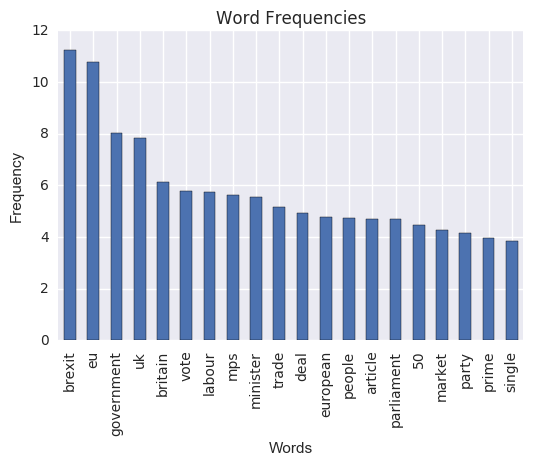

In [96]:
frequencies = df.sum()
frequencies.sort_values(inplace=True)
largest = frequencies.nlargest(20)
ax = largest.plot(kind = "bar",title="Word Frequencies")
ax.set(xlabel="Words",ylabel="Frequency")

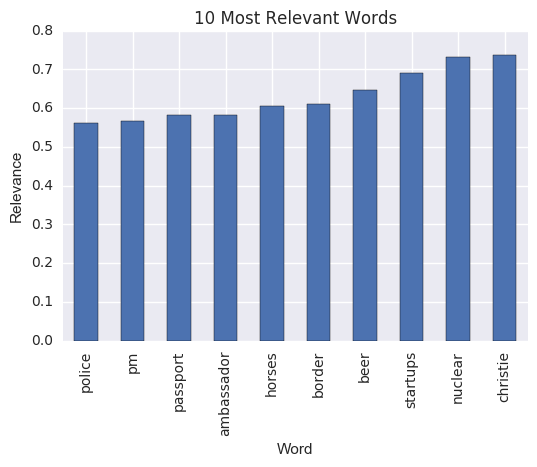

In [97]:
df_top_10_tfidf = df.max().sort_values()[-10:]
axis = df_top_10_tfidf.plot(kind='bar', title="10 Most Relevant Words", grid=True)
axis.set_xlabel("Word")
axis.set_ylabel("Relevance")

As Brexit was one of the query terms, it expectedly appears among the most frequent words, almost as often as the EU, thought after, which the frequencies fall to almost half as much.

10746


([<matplotlib.patches.Wedge at 0x1225453c8>,
  <matplotlib.text.Text at 0x11bd21828>])

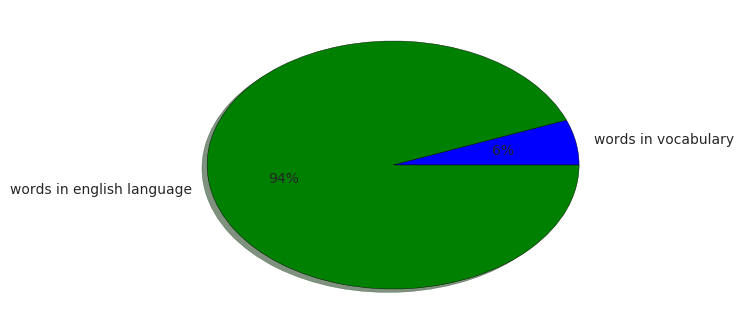

In [98]:
vocabulary_length = len(df.columns)
print(vocabulary_length)
# information taken from https://en.oxforddictionaries.com/explore/how-many-words-are-there-in-the-english-language
num_words_in_english_language = 171476

labels = 'words in vocabulary', 'words in english language'
fracs = [vocabulary_length, num_words_in_english_language]

plt.pie(fracs, labels=labels, autopct='%.0f%%', shadow=True)

We thought it would be interesting to compare the number of words used in our documents vs the number of words in the English language. We would have thought that there would be more used from the English language, but if writers want to reach a general audience it would make sense to use a general vocabulary.

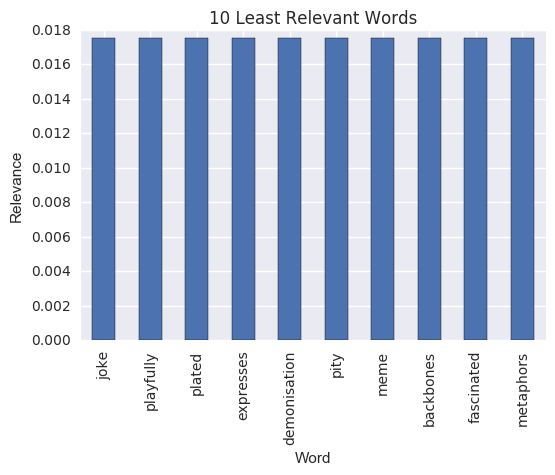

In [99]:
df_bottom_10_tfidf = df.max().sort_values()[:10]
axis = df_bottom_10_tfidf.plot(kind='bar', title="10 Least Relevant Words", grid=True)
axis.set_xlabel("Word")
axis.set_ylabel("Relevance")

It is interesting to see "import" have such a low relevance, since trade with other nations will be so important post Brexit. This could be due to the most relavant words being so closely related to imports, such as trade, prices, market, and business.

Another interesting word is India. Since the UK is trying to increase harden it's stance on immigration, we thought that India would at least not appear in least relevant words, considering a large amount of UK immigrants are from India.

(see http://www.telegraph.co.uk/news/general-election-2015/politics-blog/11622718/Immigration-nation-where-are-the-Britains-migrants-coming-from-and-why.html)

India is also interesting because of a potential loss of a trade partnership between the two nations.

See: http://www.independent.co.uk/news/uk/politics/brexit-uk-britain-india-trade-deal-freedom-of-movement-delhi-boris-johnson-a7534026.html

/Users/rupalsanghavi/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


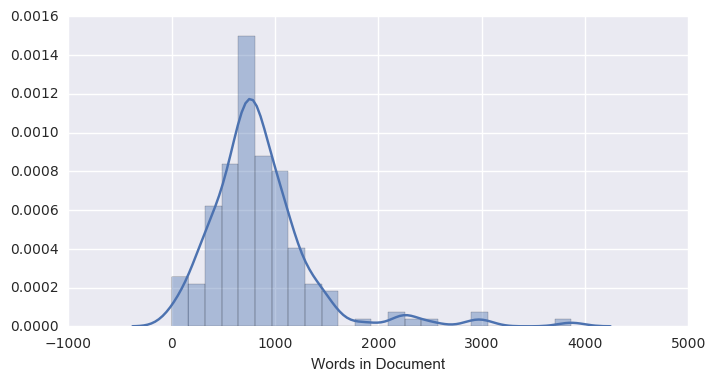

In [100]:
df = pd.DataFrame({'Lengths': doc_lengths})
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)

sns.distplot(df.Lengths.values, axlabel="Words in Document")

This diagram shows that the majority of the documents in this dataset have approximately 800 words and that the lengths values have a slight right skewedness.

In [101]:
url = "https://content.guardianapis.com/search"
payload = {'api-key': "6ff8fcd2-050d-4801-a29f-848c8b750b6e", 'q':'brexit', 'show-blocks':'body', 
           'page-size': 200, 'show-tags': 'contributor' } # key/values for get request (look up in api, there are lots)

In [102]:
with closing(requests.get(url,params=payload)) as r:
    articles = r.json()
#     print(articles)
summaries = [x['sectionId'] for x in articles['response']['results']]

words = [word for document in summaries for word in document.split()]
words_no_dup = list(set(words))


In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf_vect = TfidfVectorizer(stop_words=stopwords)

tfidf_mat = tfidf_vect.fit_transform(summaries) 
# convert to pandas to get better idea about the data
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())

In [104]:
most_common_rel_words = df.sum()

In [105]:
df = pd.DataFrame({'Section IDs': words})
df_grouped = df.groupby(by='Section IDs')


The 10 most relevant words from our articles. The following is an analysis as to why they might be the most relevant.

**agreement:** Likely discussion on the UK to invoke its agreement called Article 50 on the Lisbon Treaty to leave the EU. We imagine that agreement shows up amongst discussion of citizens agreeing about the decision, and the UK having to form new agreements with nations.
    
**market:** UK's markets were fluctuating and are still fully unknown on where they will end up.

**small:** There is much discussion about the UK's small businesses.

**brexit:** Self explanatory

**business:** The UK will have to figure out how it's business will interact with the EU and with other nations.

**uk:** Self explanatory

**prices:** Prices will be in fluctation. There will likely be many price increases due new tarrifs on imported goods.

**pound:** With prices changing and the market changes, the British pound will change in value.

**eu:** Self explanatory
    
**trade:** A major discussion is how the UK will trade with the EU.

## Visualizing Most Common Relevant Words and Word Frequencies for Target Classes 

['technology', 'law', 'education', 'voluntary-sector-network', 'suez-circular-economy-zone', 'world', 'business', 'global', 'higher-education-network', 'stage', 'media', 'media-network', 'info', 'tv-and-radio', 'commentisfree', 'artanddesign', 'fashion', 'books', 'small-business-network', 'environment', 'us-news', 'membership', 'lifeandstyle', 'uk-news', 'society', 'politics', 'money']
Count :1


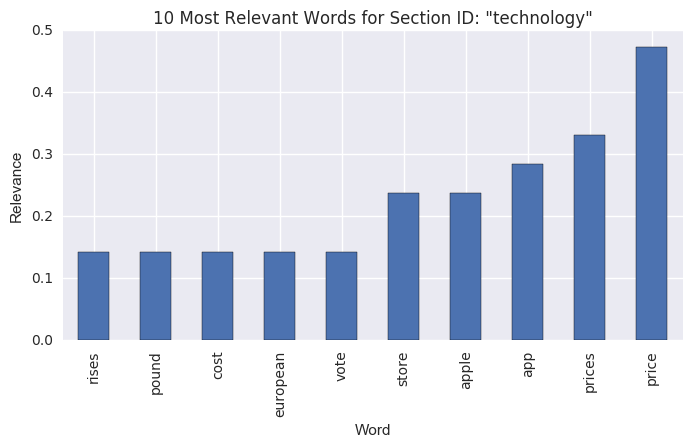

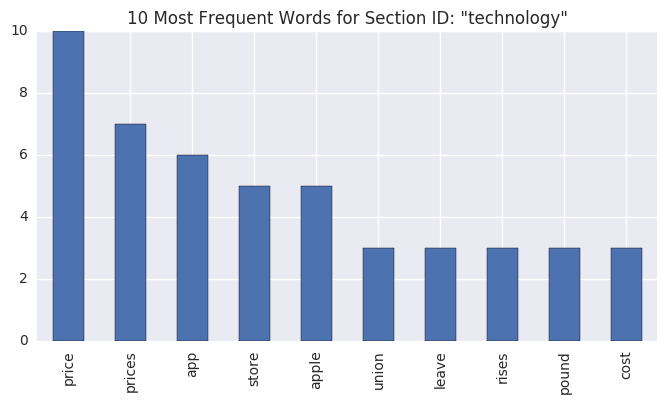

Count :1


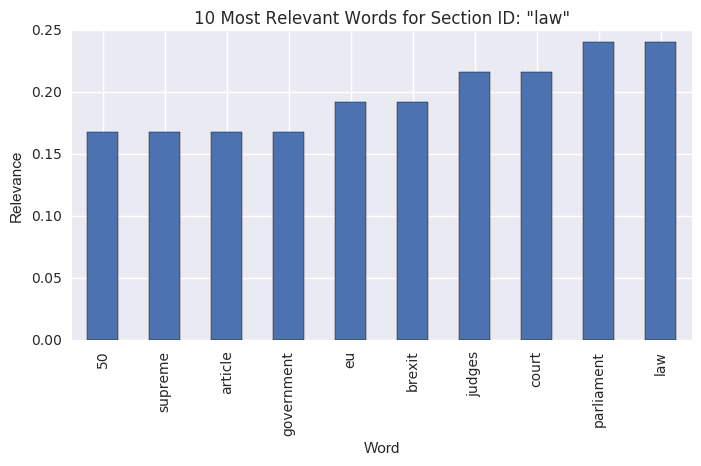

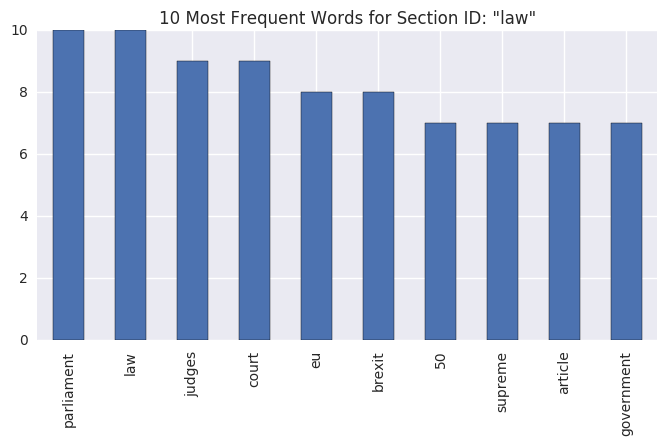

Count :4


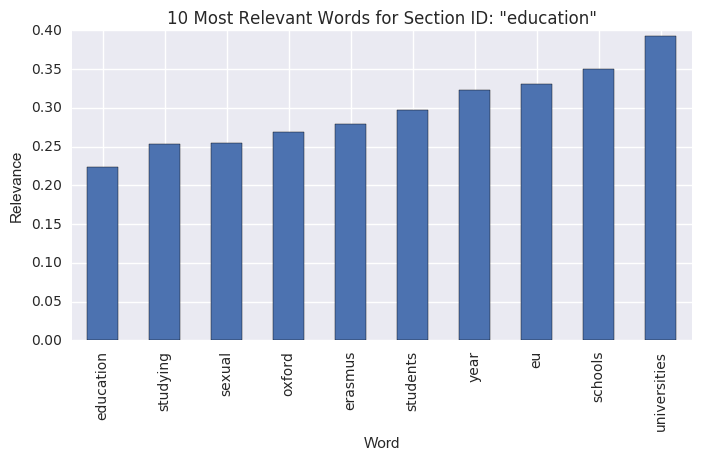

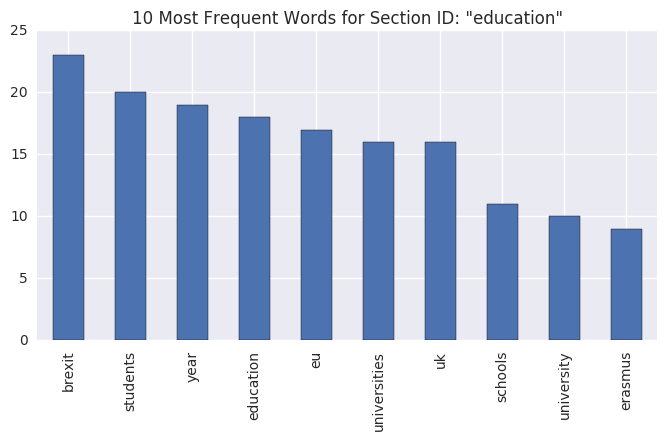

Count :1


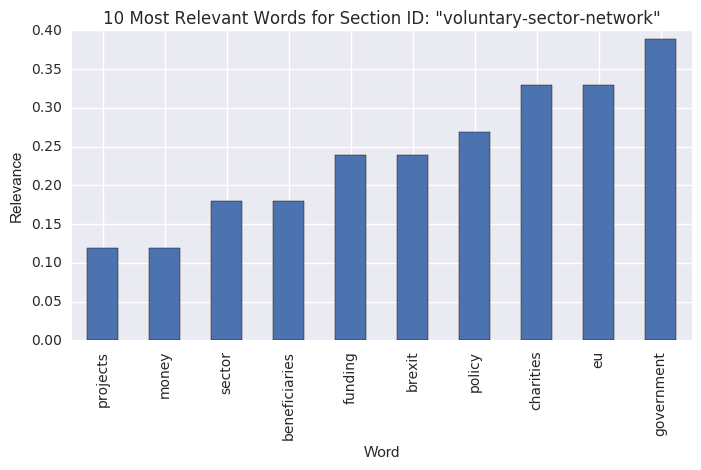

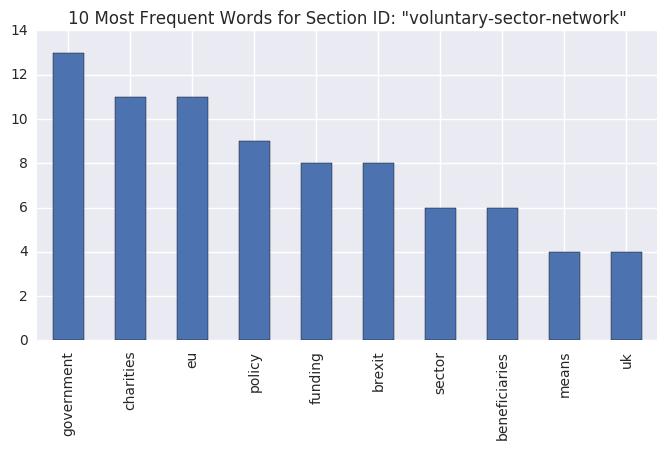

Count :1


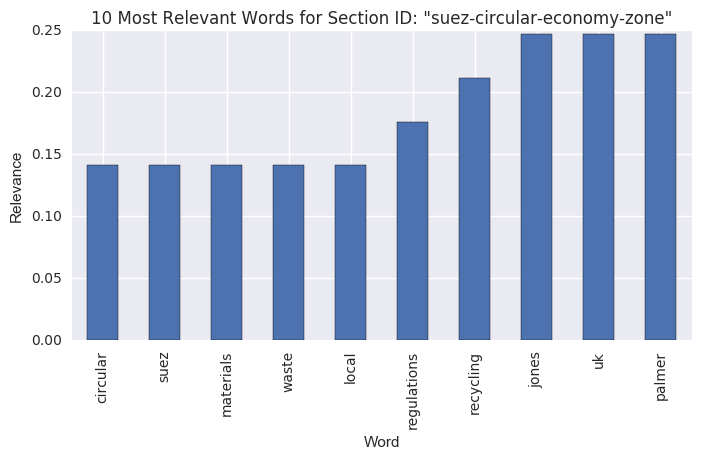

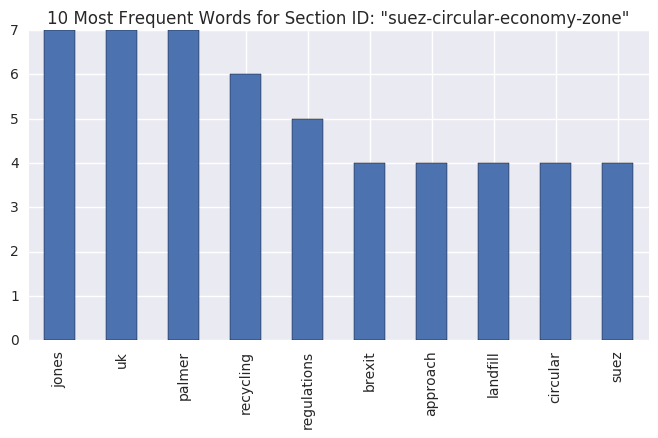

Count :4


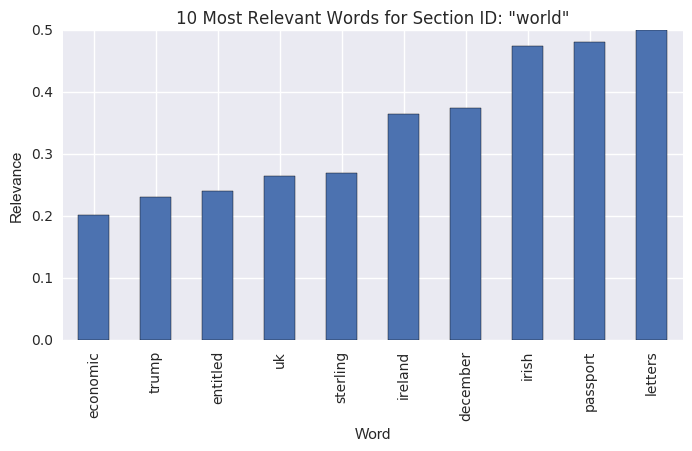

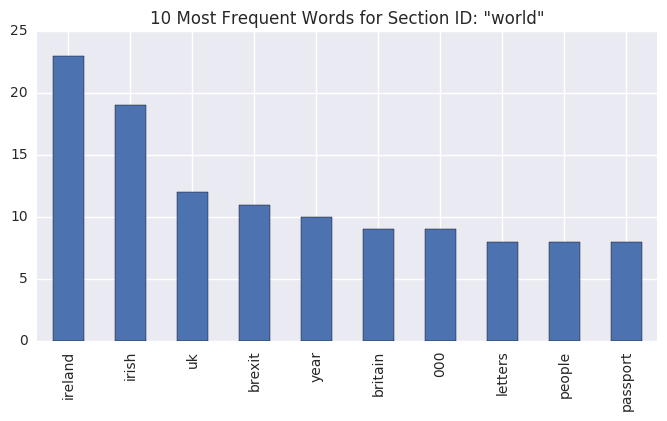

Count :21


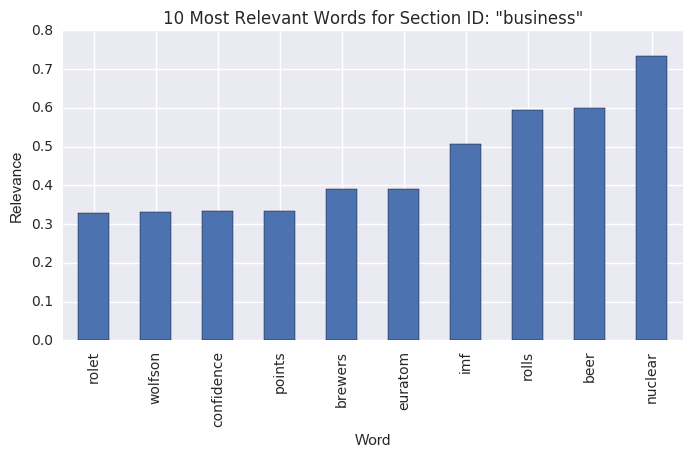

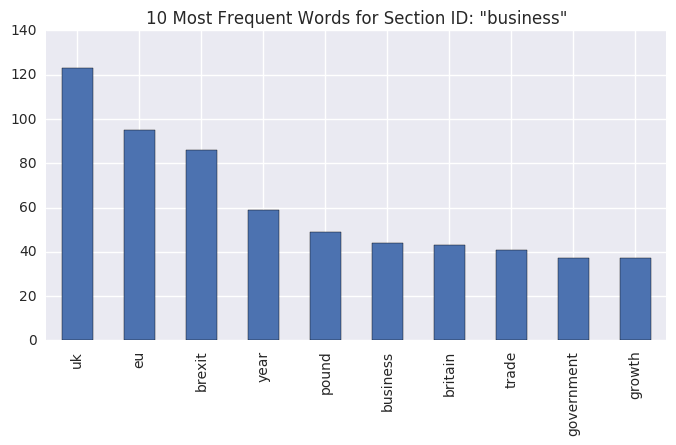

Count :2


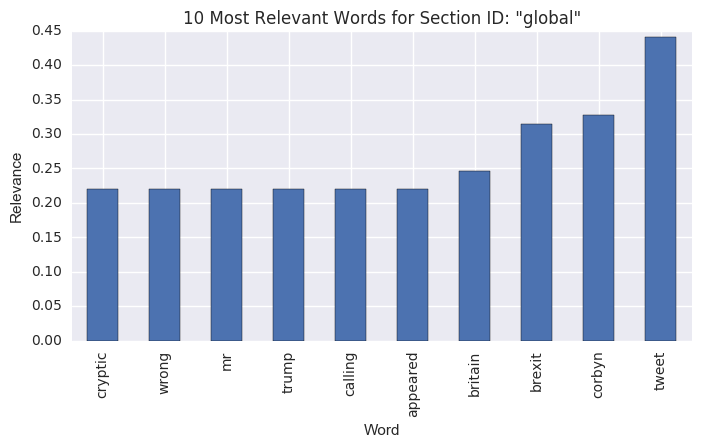

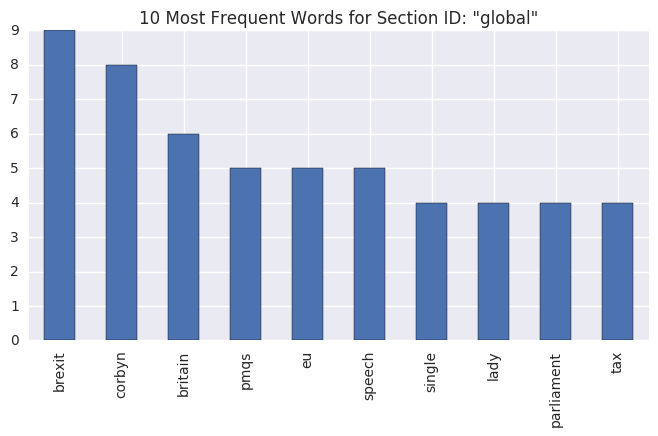

Count :1


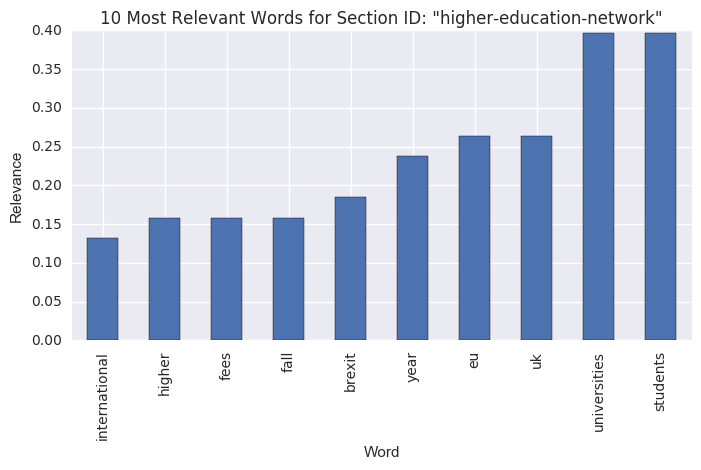

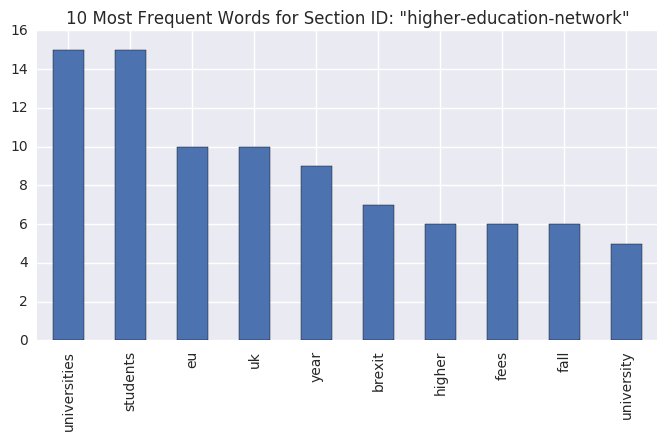

Count :2


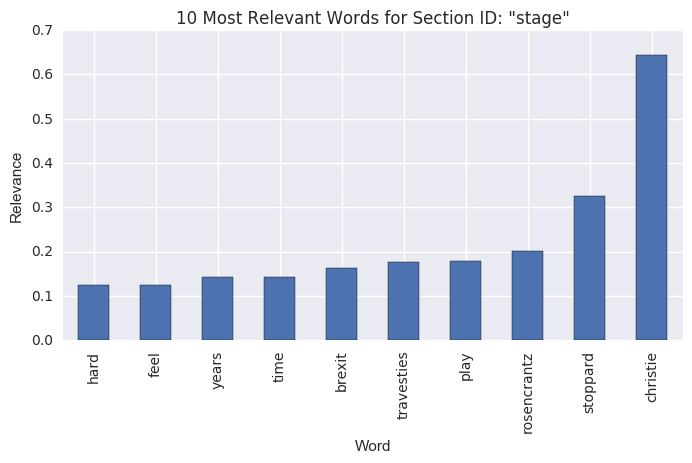

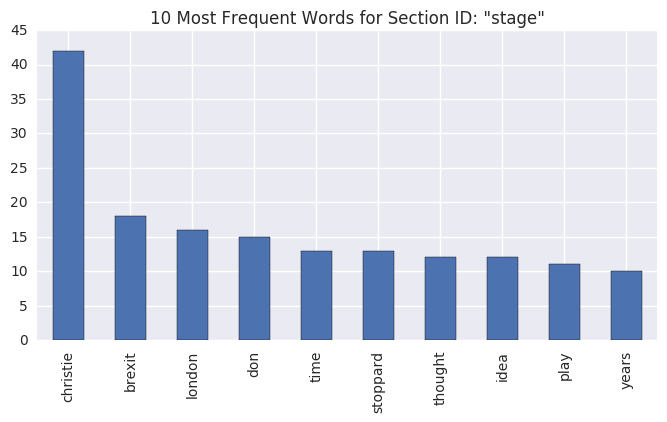

Count :3


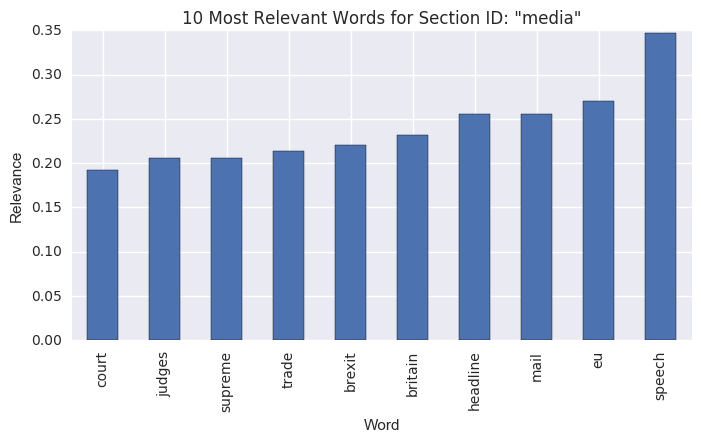

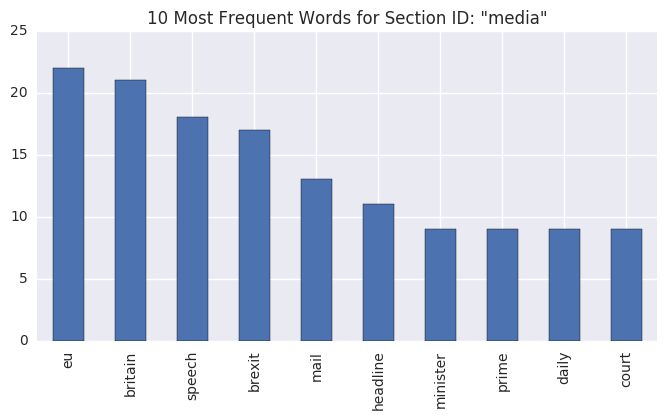

Count :1


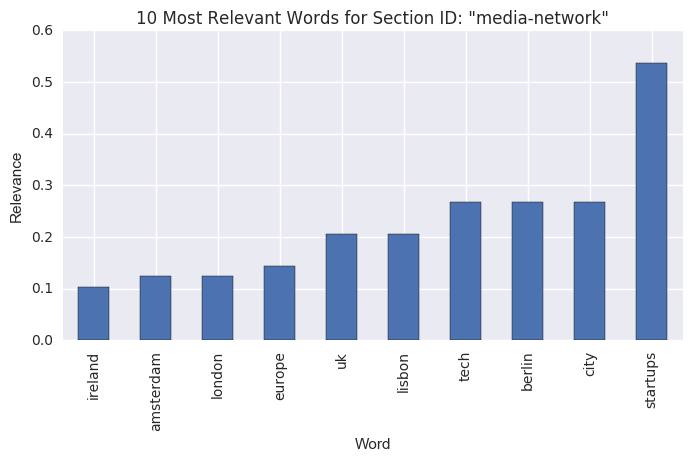

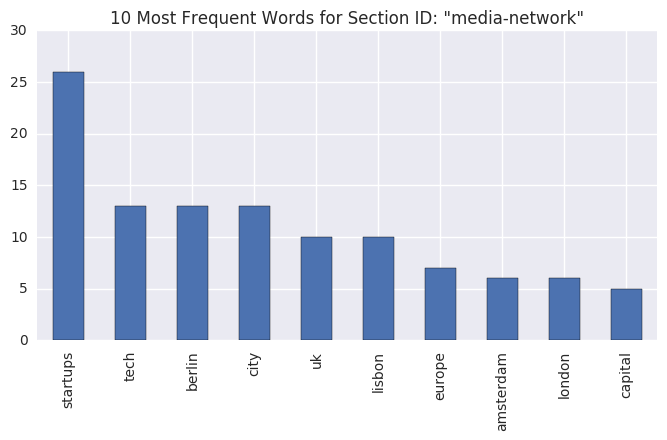

Count :1


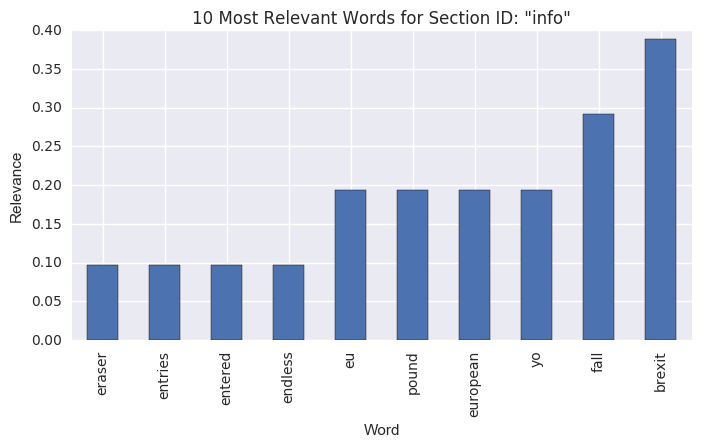

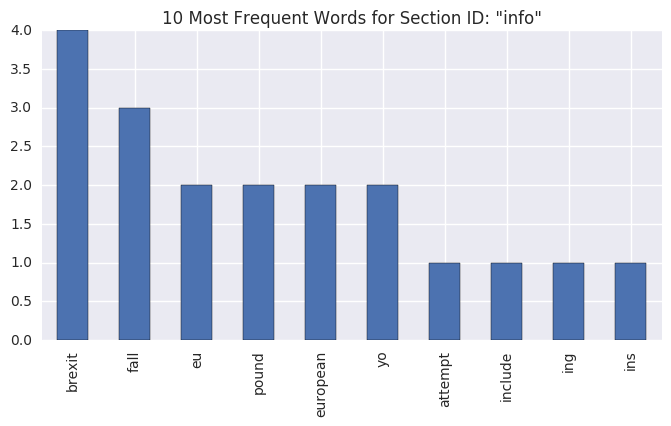

Count :1


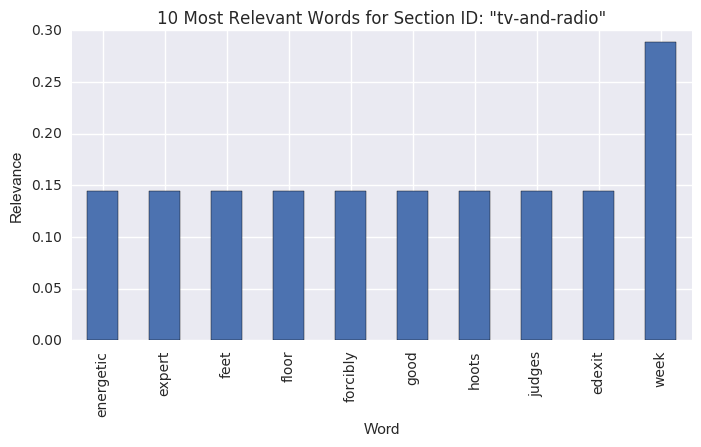

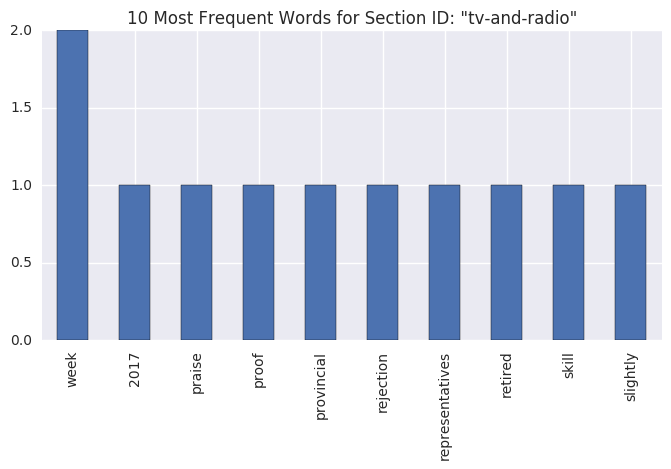

Count :23


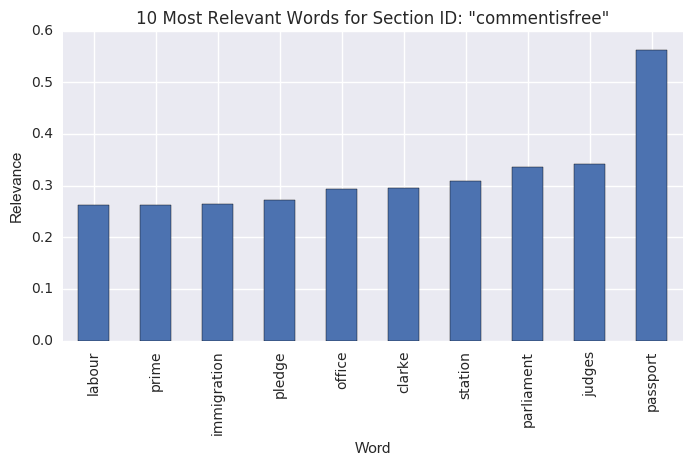

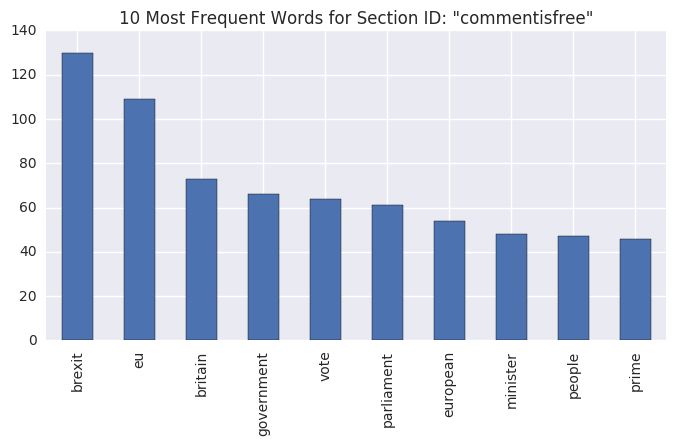

Count :1


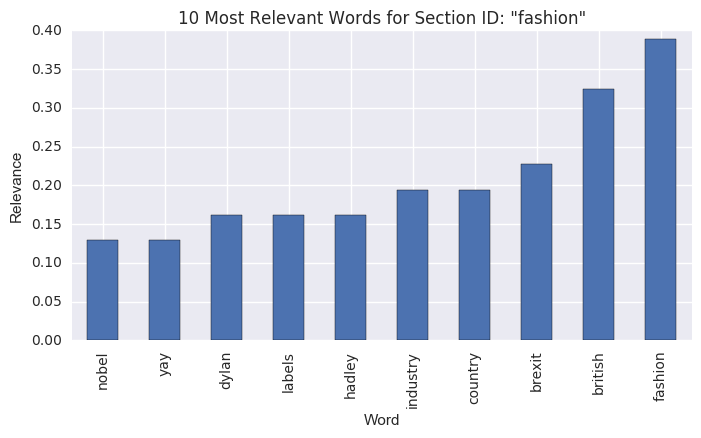

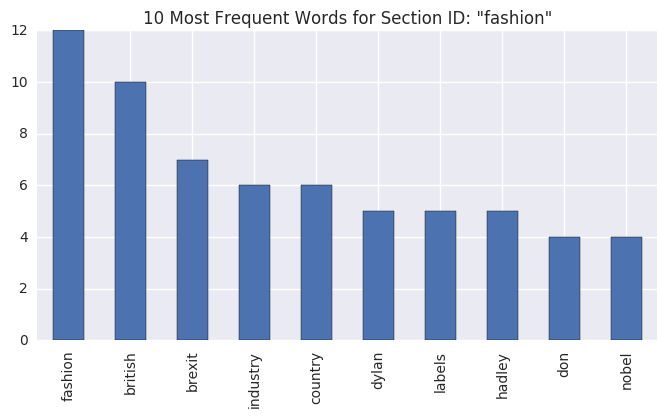

Count :2


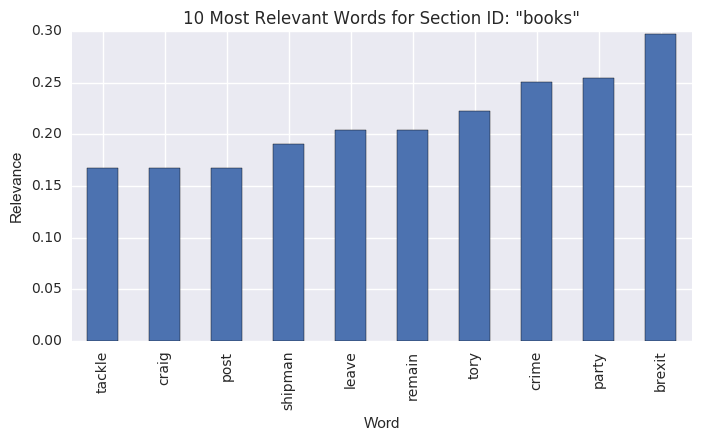

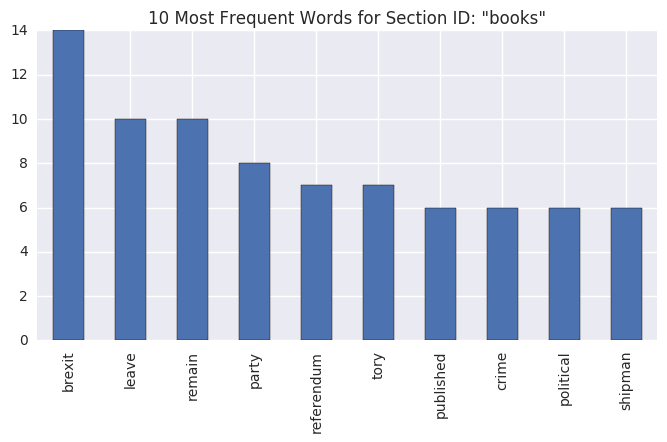

Count :2


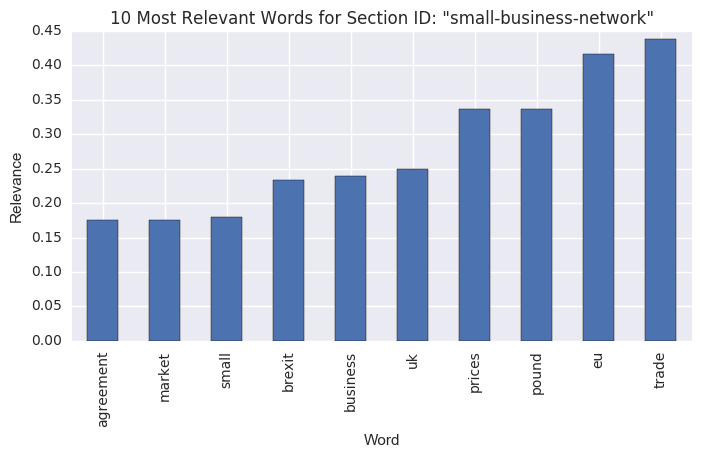

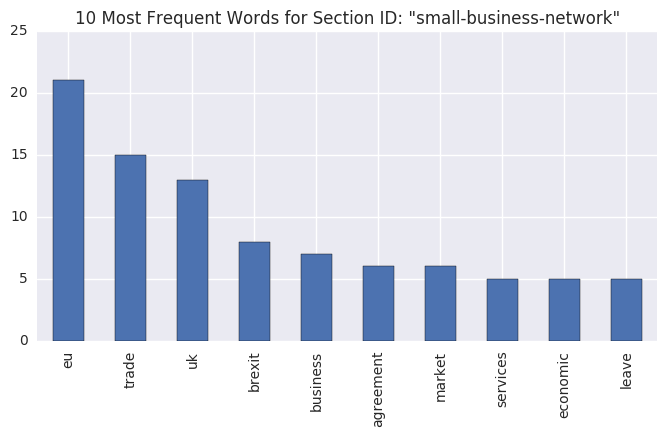

Count :3


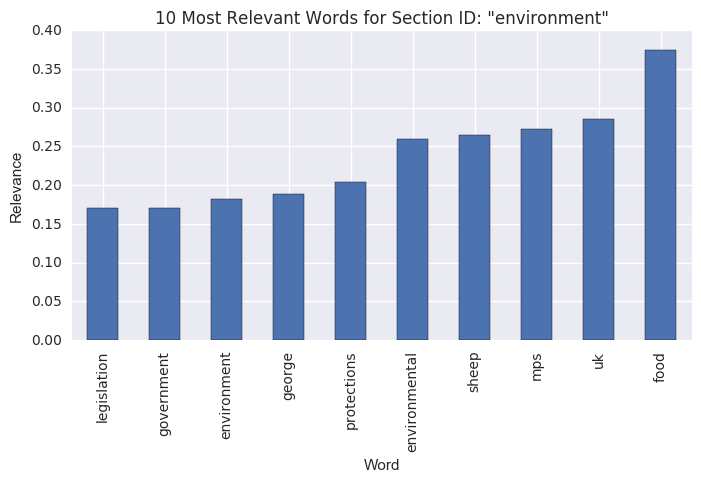

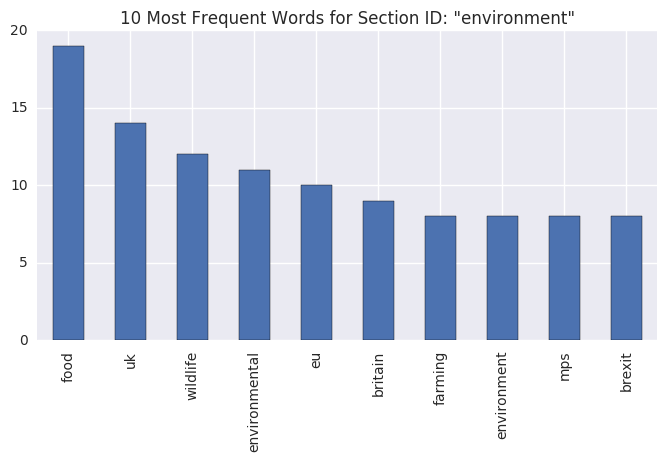

Count :3


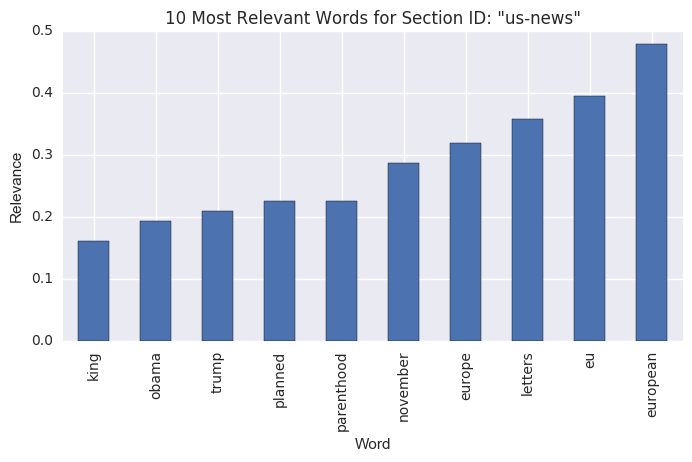

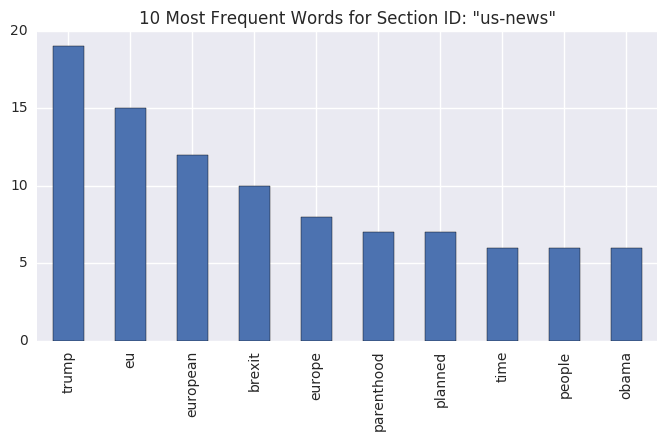

Count :1


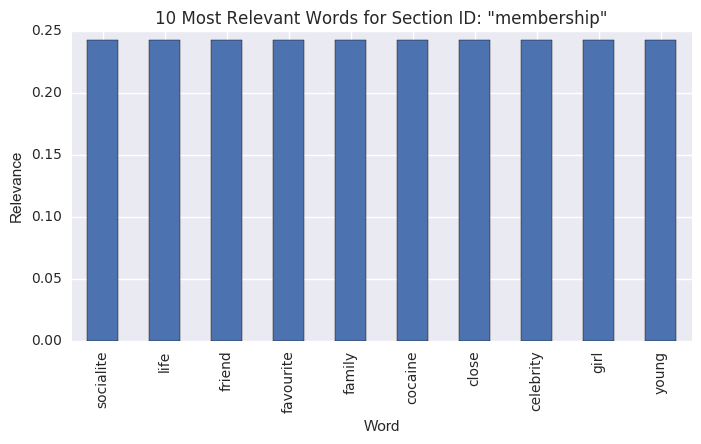

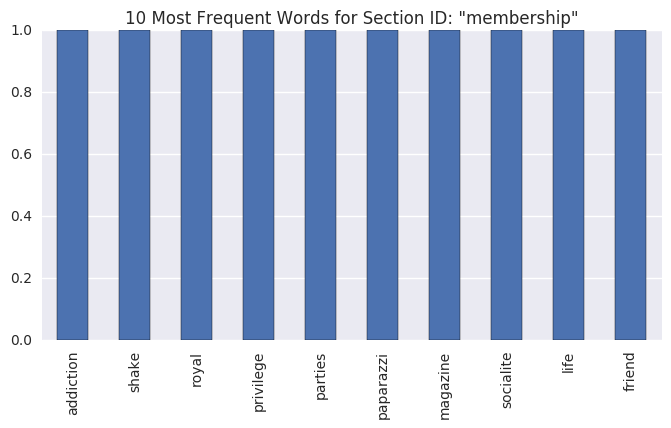

Count :3


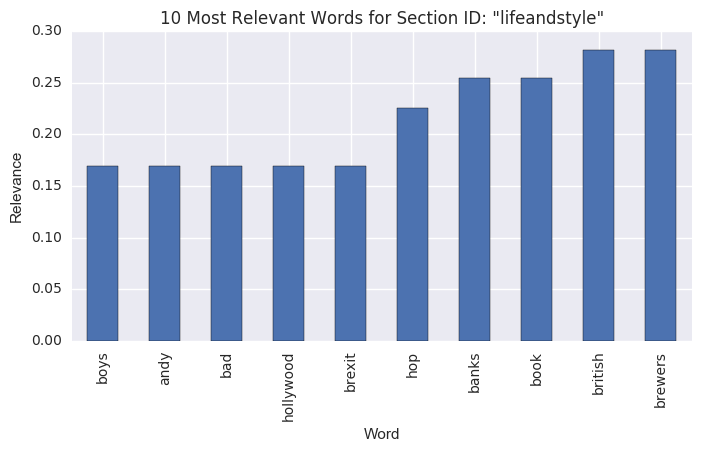

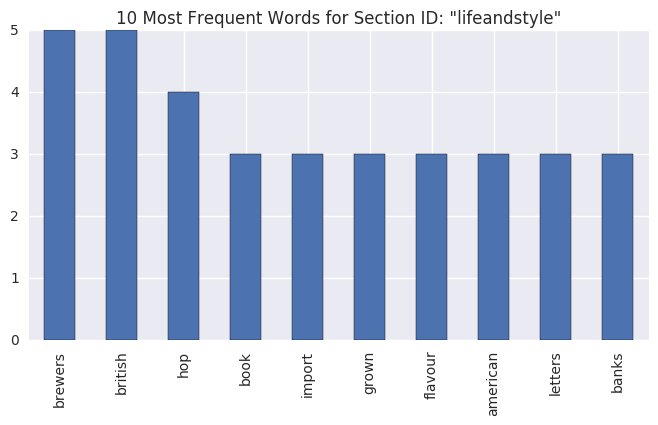

Count :8


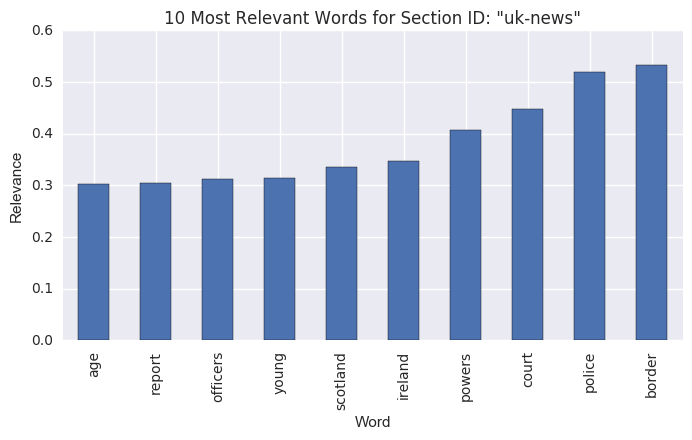

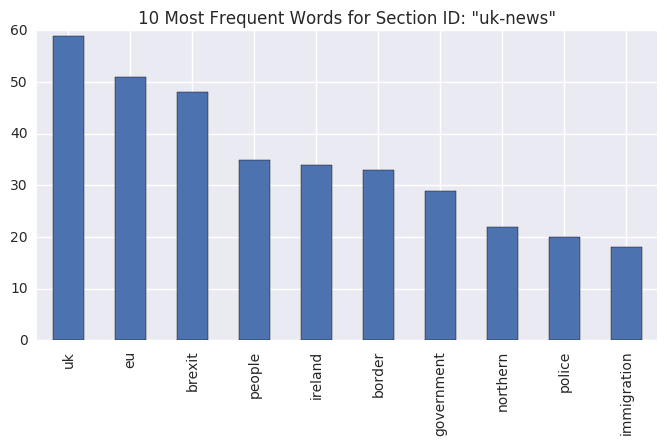

Count :1


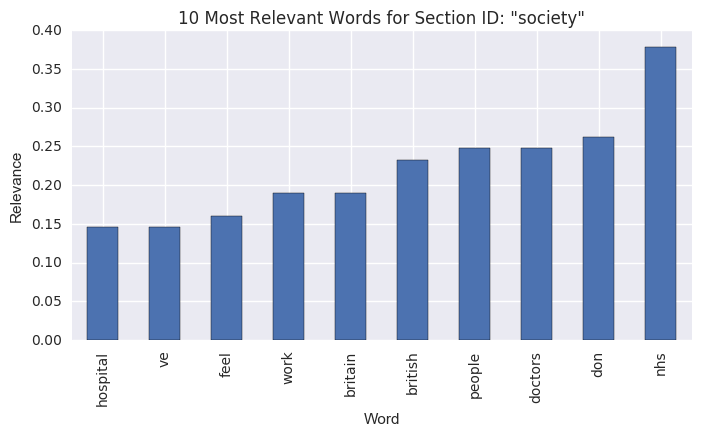

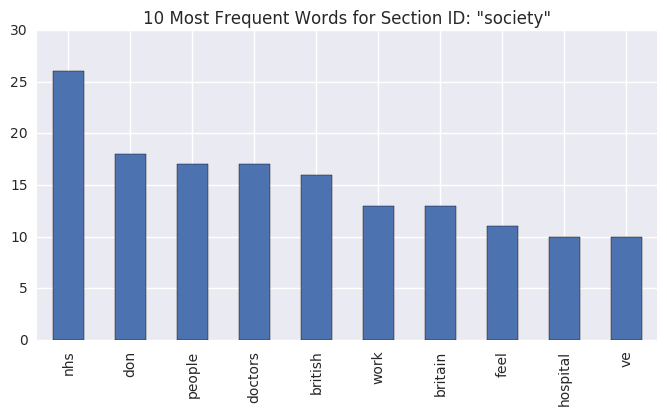

Count :107


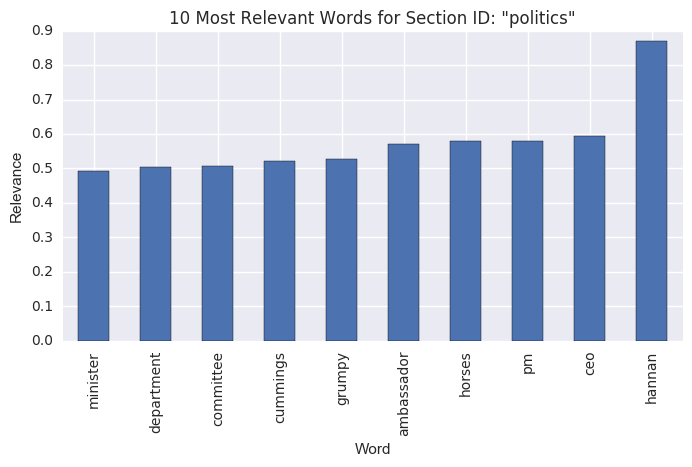

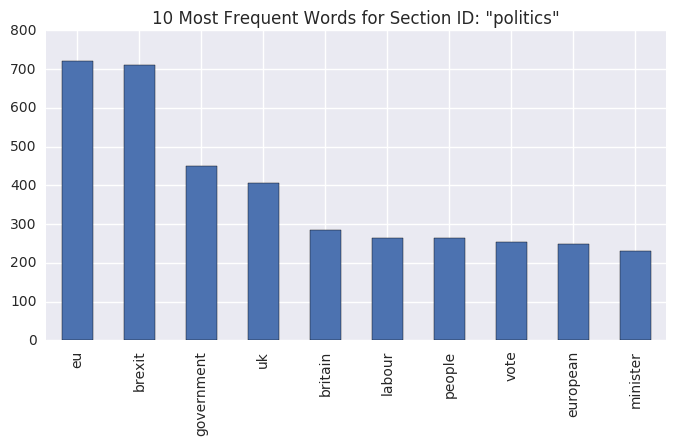

Count :1


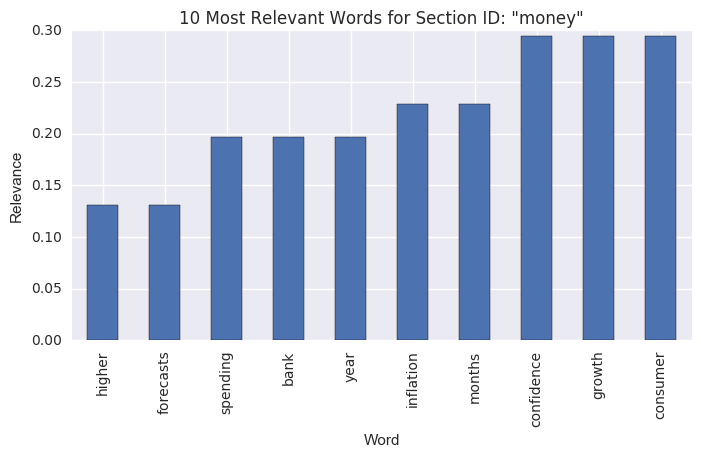

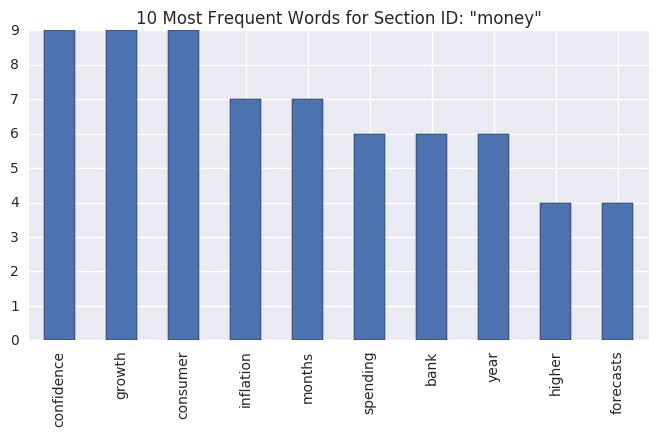

In [106]:
print(words_no_dup)
#words_no_dup1 = ["education","artsanddesign"]
for topic in words_no_dup:
    summaries = []
    count = 0
    for x in articles['response']['results']:
        if x['sectionId']== topic:
            summaries.append(x['blocks']['body'][0]['bodyTextSummary'])
            count+=1
    if(count!= 0 and summaries != ['']):        
        print("Count :"+ str(count))
        tfidf_vect = TfidfVectorizer(stop_words=stopwords)
        tfidf_mat = tfidf_vect.fit_transform(summaries) 
        df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
        df_top_10_tfidf = df.max().sort_values()[-10:]
        axis = df_top_10_tfidf.plot(kind='bar', title="10 Most Relevant Words for Section ID: \"" + topic +"\"")

        count_vect = CountVectorizer(stop_words=stopwords)
        bag = count_vect.fit_transform(summaries)
        summaries_df = pd.DataFrame(data=bag.toarray(),columns=count_vect.get_feature_names())

        axis.set_xlabel("Word")
        axis.set_ylabel("Relevance")
        plt.show()
        summaries_df = summaries_df.sum()
        summaries_df.sort_values(inplace=True)
        largest = summaries_df.nlargest(10)
        largest.plot(kind = "bar", title="10 Most Frequent Words for Section ID: \"" + topic +"\"")
        axis.set_ylabel("Frequency")
        plt.show()

It is interesting to see that the top 4-5 categories for most target classes are common amongst the 10 Most Relevant Words and the 10 Most Frequent Words. 

It seems that "info" target class documents reflect concern about a "fall" in relation to Brexit.

For the "business" articles, "beer" and "nuclear" are highly relevant, that might indicate economic pessimism or fear in relation to Brexit. This conclusion is strengthened by the fact that the "lifeandstyle" target class also has "beer" as highly relevant.

Regarding conclusions based off the target class "money", the high frequency and relevancy of the words "confidence" and "growth" indicates that there seems to be a positive economic outlook in articles discussing Brexit. Though this is offset by the presence of "inflation" in the top 5. 

The most relevant words in the "commentisfree" target class, which is the comment and public opinion site from the Guardian, indicate that the controversial topics in documents containing Brexit are relating to judges, parliament, Ken Clarke, and/or the Labour Party. It is ironic how the top relevant words in the "info" and "business"/"money" classes do not overlap with those in "commentisfree", which either could indicate there is strong factual backing or little debate regarding positions relating to Brexit such as "growth" and "nuclear". 

In the "books" target class, the almost equal numerical relevancy of the terms "remain" or "leave" seems to indicate an equal number of proponents on each side of the argument. 

The "us-news" target class has "Trump" as the most frequent word, perhaps reflecting his vocality regarding the Brexit issue.

The “small-business-network” target class reflects Brexit's effect on trade and the pound, as evidenced by the number of documents written containing those words. Whether good or bad can be linked to the "business" target class which indicated pessimism.

The “environment” target class reflects Brexit's effect on the highly relevant words food, wildlife, and the farming industry, whether good or bad seems hard to tell. 

The “uk-news” target class brings up an interesting comparison to a similar recent topic of conversation in America, due to the the highly relevant words border and police. 

The “world” target class diagrams reflect Brexit's effect on the Irish and travel laws.

The “society” target class diagrams reflect Brexit's affect on the health industry (as evidenced by the highly relevant words NHS and doctors)

The “politics” target class relevancy diagram highlight important people in the Brexit movement such as the Prime Minister, Hannan, and a CEO.

Lastly the “suez-circular-economy-zone” and "global" target class diagrams reflect the affect of Brexit on recycling, and the role of other important people such as Jones and Palmer and social media in the form of Twitter. 


## Exceptional Work 

## Wordcloud based on word frequencies

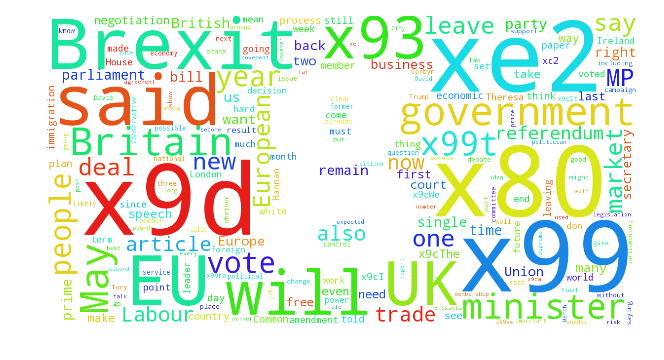

In [107]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image

# code to create text file
# text = open('summaries_as_textfile.txt', 'w')
# for summary in summaries:
#     text.write("%s\n" % summary.encode("utf-8"))

guardian_mask = np.array(Image.open("guardianlogo.png"))

text_for_wc = open("summaries_as_textfile.txt").read()

wc = WordCloud(background_color="white", mask=guardian_mask)
wc.generate(text_for_wc)

plt.imshow(wc)
plt.axis("off")
# plt.figure()

# plt.imshow(guardian_mask)
plt.axis("off")
plt.show()


It makes sense that Brexit is the largest word. 